Metadata

This analysis includes working with two datasets:

  1. Retail Data Transactions

  2. Retail Data Response

Retail Data Transactions contains:

  1. customer_id : A unique id given to every customer whoever made a transaction.

  2. trans_date : The date when the transaction was made.

  3. trans_amount : The amount of purchase.

Retail Data Response contains: 

  1. customer_id : A unique id given to every customer whoever made a transaction.

  2. response : provides the response information of each of the customers. It is a binary variable indicating whether the customer responded to a campaign or not.

In [58]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [27]:
#importing the datasets
trans = pd.read_csv("Retail_Data_Transactions.csv")
res = pd.read_csv("Retail_Data_Response.csv")

In [28]:
res.head()

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1


In [29]:
trans.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [30]:
print("Transaction dataset shape: ",trans.shape)
print("Response dataset shape: ",res.shape)

Transaction dataset shape:  (125000, 3)
Response dataset shape:  (6884, 2)


# Data Cleaning

In [44]:
#Merging both datasets into a single dataset
df = trans.merge(res,how = 'left',on = 'customer_id')

In [45]:
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [46]:
print('Shape of the dataset after merging: ',df.shape)

Shape of the dataset after merging:  (125000, 4)


In [47]:
#checking the null values in the dataset
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [48]:
#droping the rows with null values
df = df.dropna()

The reason for dropping the rows with null values is because it does not make any difference if those records are there or not as we have 125000 rows. The 31 rows doesn't make any difference

In [49]:
print('Shape of the dataset after dropping some rows: ',df.shape)

Shape of the dataset after dropping some rows:  (124969, 4)


In [50]:
#Checking the data types of each column
df.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

The datatype of 'trans_date' column is string, which makes it difficult to use while doing analysis. So changing the data type accordingly for further analysis

In [51]:
df.trans_date = pd.to_datetime(df.trans_date)

<ipython-input-51-7af262f49c9f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.trans_date = pd.to_datetime(df.trans_date)


In [52]:
df['response'] = df.response.astype('int64')

In [53]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

# Checking Outliers

z-score method

In [62]:
z_scores = np.abs(stats.zscore(df['tran_amount']))
threshold = 3
outliers = z_scores > threshold
print("Number of outliers in the tran_amount column are: ",outliers.sum())

Number of outliers in the tran_amount column are:  0


IQR method

In [74]:
q3 = df.tran_amount.quantile(0.75)
q1 = df.tran_amount.quantile(0.25)
iqr = q3 - q1
upper_quartile = q3 + (1.5 * iqr)
lower_quartile = q1 - (1.5 * iqr)
outliers = df[(df.tran_amount >upper_quartile) | (df.tran_amount < lower_quartile)]
print('No of outliers in the tran_amount column is: ',outliers.shape[0])

No of outliers in the tran_amount column is:  0


Using Boxplot

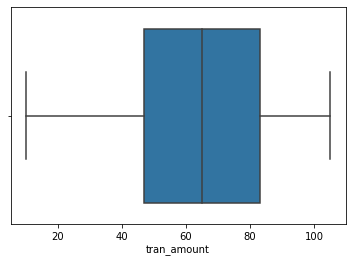

In [67]:
sns.boxplot(x = df.tran_amount)
plt.show()

# Data Preperation

Adding some new columns in the dataframe

In [218]:
def get_month_name(month_number):
    return pd.Timestamp(month_number - 1, unit='M').strftime('%B')

In [219]:
df['month'] = df.trans_date.dt.month
df['year'] = df.trans_date.dt.year
df['day'] = df.trans_date.dt.day
df['month_name'] = df['month'].apply(get_month_name)

# Data Analysis

In [141]:
#Top 5 customers with most transactions
topcus = pd.DataFrame(df.customer_id.value_counts().reset_index().head())
topcus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


In [174]:
#Top 5 customers with highest overall transaction amount
topcusamt = pd.DataFrame(df.groupby('customer_id')['tran_amount'].sum().sort_values(ascending = False).head())
topcusamt

,tran_amount
customer_id,
CS4424,2933
CS4320,2647
CS5752,2612
CS4660,2527
CS3799,2513


<AxesSubplot:xlabel='customer_id', ylabel='count'>

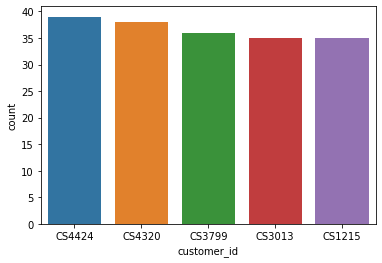

In [175]:
sns.barplot(x = 'customer_id',y='count',data = topcus)

<AxesSubplot:xlabel='customer_id'>

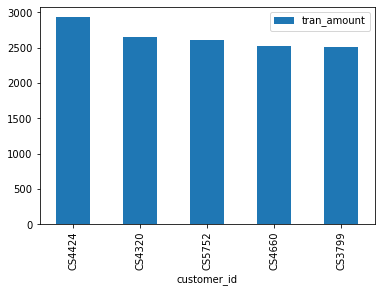

In [177]:
topcusamt.plot(kind = 'bar')

From the above two charts we can interpret the customers with highest no of transactions and highest value of transactions.

We can see that CS3799 has made many transactions but the amount he spent in those transactions is less.

Similarly, CS5752 has not made many transactions compared to top 5 people but the money he spent is greater than CS3799

In [249]:
#Top 5 months with highest sales
monthly_sales = df.groupby(['month','month_name'])['tran_amount'].sum().reset_index()
top_sales = monthly_sales.sort_values(by = 'month')
top_sales=pd.DataFrame(top_sales)
top_sales

,month,month_name,tran_amount
0,1,January,724089
1,2,February,645028
2,3,March,636475
3,4,April,515746
4,5,May,633162
5,6,June,697014
6,7,July,717011
7,8,August,726775
8,9,September,694201
9,10,October,725058


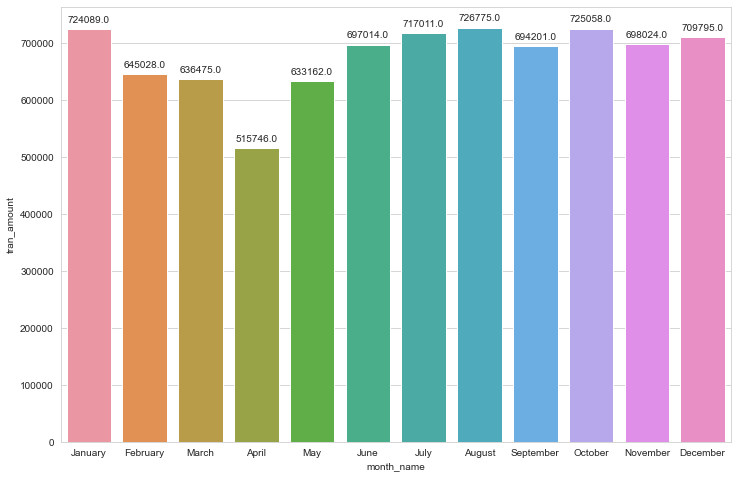

In [250]:
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
ax = sns.barplot(x='month_name',y = 'tran_amount',data = top_sales)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

Cummulative sales of each month is highest for the month of august

In [251]:
#Top 5 months with highest sales
yearly_sales = df.groupby('year')['tran_amount'].sum().reset_index()
top_sales = yearly_sales.sort_values(by = 'tran_amount',ascending = False)
top_year_sales=pd.DataFrame(top_sales)
top_year_sales.head()

,year,tran_amount
2,2013,2137140
1,2012,2115542
3,2014,2094508
0,2011,1340013
4,2015,435175


<AxesSubplot:xlabel='year', ylabel='tran_amount'>

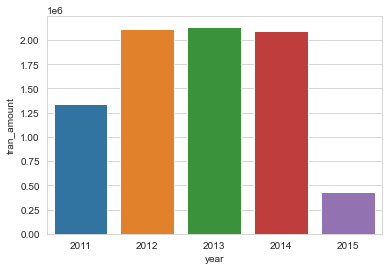

In [252]:
sns.barplot(x = 'year',y = 'tran_amount',data = top_year_sales)

Year 2013 has highest number of sales

In [263]:
#Top 5 days in the history of sales
top5days=pd.DataFrame(df.groupby(['trans_date'])['tran_amount'].count().sort_values(ascending = False)).reset_index().head()
top5days

,trans_date,tran_amount
0,2011-07-16,141
1,2014-04-15,124
2,2011-09-18,124
3,2011-08-11,122
4,2014-09-28,121


In [206]:
pd.DataFrame(df.groupby(['response','year'])['customer_id'].count()).reset_index()

,response,year,customer_id
0,0,2011,18619
1,0,2012,29225
2,0,2013,28997
3,0,2014,28183
4,0,2015,6103
5,1,2011,2032
6,1,2012,3296
7,1,2013,3903
8,1,2014,4043
9,1,2015,568


# Time-Series Analysis

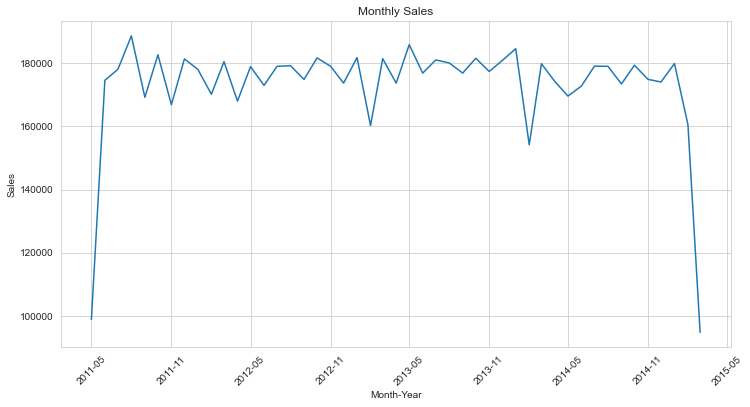

In [276]:
import matplotlib.dates as mdates

df['month_year'] = df['trans_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize = (12,6))
plt.plot(np.array(monthly_sales.index),np.array(monthly_sales.values))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval = 6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation =45)

plt.show()


The sales have been on top in the period of may-2011 and november-2011 and have a huge drop during the period november-2013 and may-2014

# Cohort Segmentation

In [284]:
#recency
recency = df.groupby('customer_id')['trans_date'].max()

#frequency
frequency= df.groupby('customer_id')['trans_date'].count()

#monetary
monetary = df.groupby('customer_id')['tran_amount'].sum()

rfm = pd.DataFrame({'recency':recency,'frequency':frequency,"monetary":monetary})
rfm.head()

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857


In [290]:
#customer segmentation

def segment_customer(row):
    if row['recency'].year >= 2012 and row['frequency'] >= 15 and row['monetary']>1000:
        return 'P0'
    elif (2011 <= row['recency'].year < 2012) and (10 < row['frequency'] < 15) and (500 <= row['monetary'] <=1000):
        return 'P1'
    else:
        return 'P2'
    
    
rfm['Segment'] = rfm.apply(segment_customer,axis = 1)

# Analysing Top Customers

<AxesSubplot:xlabel='month_year'>

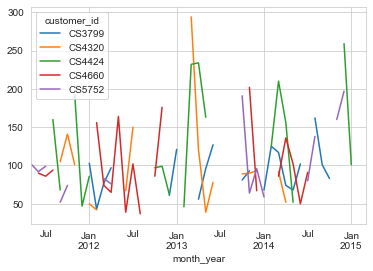

In [323]:
top5cus=monetary.sort_values(ascending = False).head().index
topcustomers_df = df[df['customer_id'].isin(top5cus)]
topcustomers_sales = topcustomers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level = 0)
topcustomers_sales.plot(kind = 'line')

These 5 customers have been constantly purchasing products over a given period of time.

# Churn Analysis

In [340]:
#This function whether the customer is churned or not. 
#This is basically done by looking at the most recent transaction of the customer and no of times the transaction is made.
def churn(data):
    if(data['recency'].year >= 2014):#This condition will ensure that the customer has made a transaction atleast a year before
        return 0 #0 indicates that the customer is not churned
    else:
        return 1 #1 indicates that the customer is churned
rfm['churned'] = rfm.apply(churn,axis = 1)

Frequency Factor is not considered in churn analysis because there might be some new customers who have just started purchasing from 2014. So, involving the frequency factor might label them as churned customer.

In [343]:
print('No of churned customers: ',rfm[rfm['churned'] == 1].shape[0])

No of churned customers:  38


These 38 people have not purchased a product since 2014.

In [353]:
df.to_csv('MainData.csv')

In [354]:
rfm.to_csv('AddAnalysis.csv')